sebelum melakukan prediksi , download dataset melalui  link yang telah diberikan melalui wget!


In [1]:
!wget -O data_titanic.csv https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

--2020-01-26 07:17:00--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57018 (56K) [text/plain]
Saving to: ‘data_titanic.csv’

data_titanic.csv    100%[===================>]  55.68K  --.-KB/s    in 0.02s   

2020-01-26 07:17:01 (2.20 MB/s) - ‘data_titanic.csv’ saved [57018/57018]



import library untuk membaca dataset dan melakukan modifikasi dataset lalu import dataset melalui read_csv lalu gunakan











head untuk membaca lima dataset teratas


In [2]:
import pandas as pd

datatitanic = pd.read_csv('data_titanic.csv')

datatitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Data Preprocessing**

ada beberapa tahapan dalam pemprosesan machine learning, pertama adalah melakukan preprocessing data, sebelum melakukannya, lakukan peirntah info untuk mendapatkan informasi lebih jelas mengenai dataset

In [0]:
datatitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


lalu digunakan perintah shape untuk melihat jumlah kolom dan row

In [0]:
datatitanic.shape

(891, 15)

dari kedua perintah diatas dapat diketahui bahwa data terdiri dari 15 kolom dengan dua kolom terdapat nilai yang kosong, selain itu ada 7 data berjenis object sehingga dalam analysis menggunakan machine learning data object harus dibuat menjadi data number

untuk lebih jelas melihat apakah ada data kosong, dilakukan perintah dibawah

In [0]:
datatitanic.isnull().sum().sort_values(ascending = False)

deck           688
age            177
embark_town      2
embarked         2
alone            0
alive            0
adult_male       0
who              0
class            0
fare             0
parch            0
sibsp            0
sex              0
pclass           0
survived         0
dtype: int64

terlihat bahwa kolom age memiliki 177 data yang kosong , embarked memiliki 2 data yang kosong , deck memiliki 688 data kosong dan embark_town memiliki 2 data yang kosong, percentase data yang kosong/hilang bisa dilihat juga melalui



In [0]:
persentase_hilang = datatitanic.isnull().sum() / datatitanic.isnull().count() * 100

round(persentase_hilang.sort_values(ascending = False),2)

deck           77.22
age            19.87
embark_town     0.22
embarked        0.22
alone           0.00
alive           0.00
adult_male      0.00
who             0.00
class           0.00
fare            0.00
parch           0.00
sibsp           0.00
sex             0.00
pclass          0.00
survived        0.00
dtype: float64

terlihat bahwa kolom deck memiliki data hilang sebanyak 77 persen , age 19.87 persen dan embark_town, embarked memiliki 0.22 persen, 

dari hasil tersebut, ada beberapa strategi yang dapat dilakukan

untuk mengatasi data hilangdi kolom age , pertama dilihat dulu apakah ada outlier menggunakan describe

In [0]:
datatitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


lalu lihat persebaran melalui value counts

In [0]:
datatitanic['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

terlihat bahwa ada beberapa outliers , dimana data age terbentang dari umur 0 sampai 80 tahun, sehingga lebih baik data hilang diganti menggunakan median

In [0]:
import numpy as np #import library numpy agar bisa mengganti nan( not a number)

avg_data_hilang = datatitanic['age'].astype("float").median(axis=0)
datatitanic["age"].replace(np.nan, avg_data_hilang, inplace=True)

untuk kolom embarked_town dan embarked, karena hanya 2 yang hilang , kita bisa menggantinya dengan data yang paling banyak muncul, yang dapat dilihat melalui value counts

In [0]:
print(datatitanic['embark_town'].value_counts())
print('\n')
print(datatitanic['embarked'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


S    644
C    168
Q     77
Name: embarked, dtype: int64


dari data diatas terlihat untuk embar_town data paling banyak adalah southampton dan untuk embarked adalah s sehingga kita bisa mengganti data hilang dengan data southampton dan s

In [0]:
datatitanic["embark_town"].replace(np.nan, 'Southampton', inplace=True)
datatitanic["embarked"].replace(np.nan, 'S', inplace=True)

karena kolom deck yang hilang lebih dari 70 persen, maka kolom tersebut akan dihilangkan

In [0]:
data_titanic = datatitanic.drop('deck', axis = 1)

data_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [0]:
data_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

terlihat bahwa sudah  tidak ada data yang hilang, selanjutnya dilakukan encoding untuk data object

In [0]:
data_titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
dtype: object

data sex dan alive hanya terdiri dari 2 data, sehingga kita bisa menggunakan replace,

male = 0
female = 1

no = 0
yes = 1

In [0]:
data_titanic["sex"].replace('male', 0, inplace=True)
data_titanic["sex"].replace('female', 1, inplace=True)

data_titanic["alive"].replace('no', 0, inplace=True)
data_titanic["alive"].replace('yes', 1, inplace=True)

sedangkan untuk data object lain. digunakan get dummies  merubah data categorical menjadi numeric

In [0]:
data_titanic_new = pd.get_dummies(data_titanic, prefix_sep ='_')

data_titanic_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,True,0,False,0,0,1,0,0,1,0,1,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,False,1,False,1,0,0,1,0,0,0,0,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,False,1,True,0,0,1,0,0,1,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,False,1,False,0,0,1,1,0,0,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,True,0,True,0,0,1,0,0,1,0,1,0,0,0,1


terakhir, merubah data boolean menjadi integer
true = 1
false = 0

In [0]:
data_titanic_new["adult_male"].replace(True, 1, inplace=True)
data_titanic_new["adult_male"].replace(False, 0, inplace=True)

data_titanic_new["alone"].replace(True, 1, inplace=True)
data_titanic_new["alone"].replace(False, 0, inplace=True)

data_titanic_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,1.0,0,0.0,0,0,1,0,0,1,0,1,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0.0,1,0.0,1,0,0,1,0,0,0,0,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,0.0,1,1.0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,0.0,1,0.0,0,0,1,1,0,0,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,1.0,0,1.0,0,0,1,0,0,1,0,1,0,0,0,1


**melakukan clustering**

dalam clustering ini saya akan menekankan kepada siapa yang selamat dengan siapa yang tidak dengan menggunakan dbscan

data yang dihapus
survived, alive karena yang dicek mana yang hidup atau tidak

age, fare karena banyak outlier

embarked dan embark town karena tidak ada hubungannya orang selamat dengan asal dia berangkat

In [0]:
data_1 = data_titanic_new[['pclass','sibsp','sex','adult_male','alone','who_man','who_woman','who_child','class_First','class_Second','class_Third']]
import numpy as np

gm = data_1.as_matrix().astype("float32")

from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(gm)
gm = stscaler.transform(gm)

from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 1, min_samples = 20)
clusters = db.fit_predict(gm)

labels =db.labels_

print('Silhouette Coefficient = ', metrics.silhouette_score(gm, labels))

Silhouette Coefficient =  0.8415714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


didapatkan shihoutte koefisien sebesar 0.84 yang menunjukkan tingkat akurasi yang tinggi

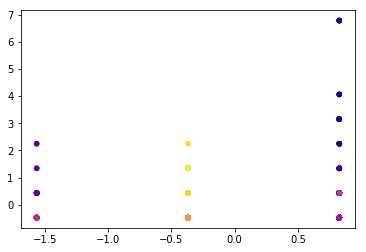

In [0]:
import matplotlib.pyplot as plt

plt.scatter(gm[:,0], gm[:,1], s=20, marker='o', c=clusters, cmap='plasma')
plt.show()